In [1]:
%run run_test.py

c:\toxakaz\projects\2024\EM-algo\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 40/40 [01:08<00:00,  1.70s/it]


In [2]:
import sys
sys.path.insert(1, '../src')

# fmt: off

from scipy.stats import weibull_min, norm
from models import WeibullModelExp, GaussianModel, Model
from em import EM
import utils
from utils import *
from distribution import Distribution
import seaborn as sns
from typing import NamedTuple
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt
import random
import pandas as pd

# fmt: on

In [3]:
import pickle
from run_test import *

with open('results.pkl', 'rb') as f:
    results: list[TestResult] = pickle.load(f)

         name                                     params  prior_probability
0  WeibullExp  (2.685388016715966, -0.14443906392283976)                1.0
samples count: 50
time         : 0.039
steps        : 2 / 16
error        : None


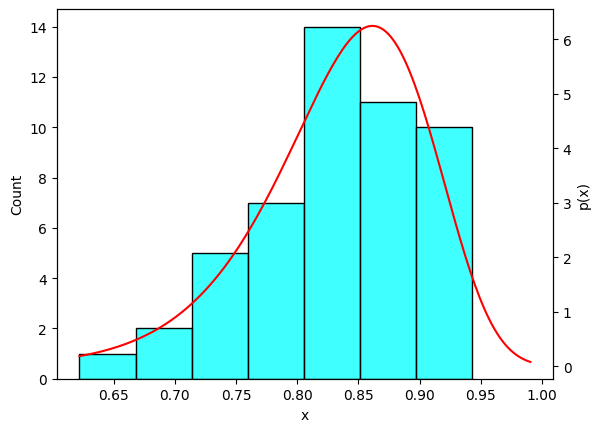



         name                                    params  prior_probability
0  WeibullExp  (2.684035303372985, -0.1498978417432616)                1.0
samples count: 100
time         : 0.071
steps        : 2 / 16
error        : None


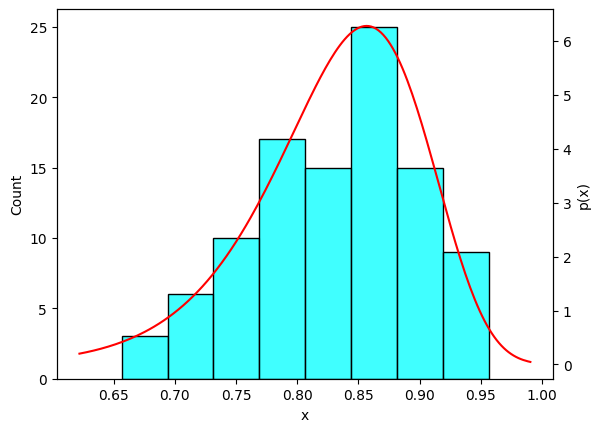



         name                                      params  prior_probability
0  WeibullExp  (2.7953903432462592, -0.14296993623945994)                1.0
samples count: 200
time         : 0.158
steps        : 2 / 16
error        : None


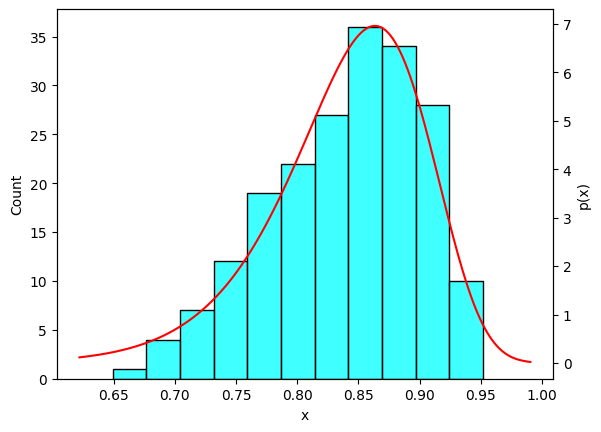



         name                                      params  prior_probability
0  WeibullExp  (2.7672256466436473, -0.14271834375607934)                1.0
samples count: 500
time         : 0.446
steps        : 2 / 16
error        : None


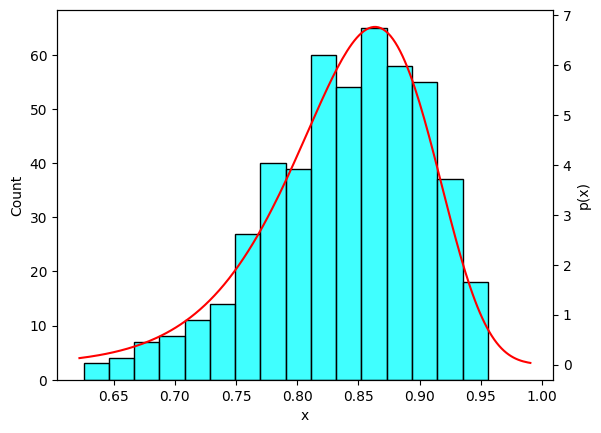



         name                                     params  prior_probability
0  WeibullExp  (2.5148990512722493, -0.9604819210370716)                0.5
1  WeibullExp   (1.950541553219994, -0.5090940909438949)                0.5
samples count: 50
time         : 0.001
steps        : 0 / 16
error        : All models can't match


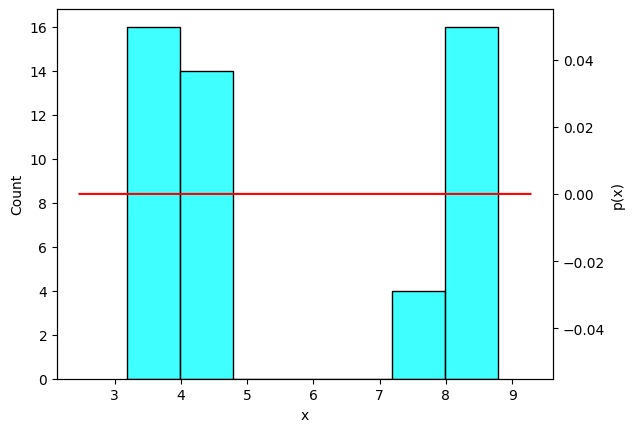



         name                                    params  prior_probability
0  WeibullExp    (2.8758602863686806, 2.10371205731705)           0.470029
1  WeibullExp  (2.6399797620767944, 1.3983054149306862)           0.529971
samples count: 100
time         : 0.204
steps        : 3 / 16
error        : None


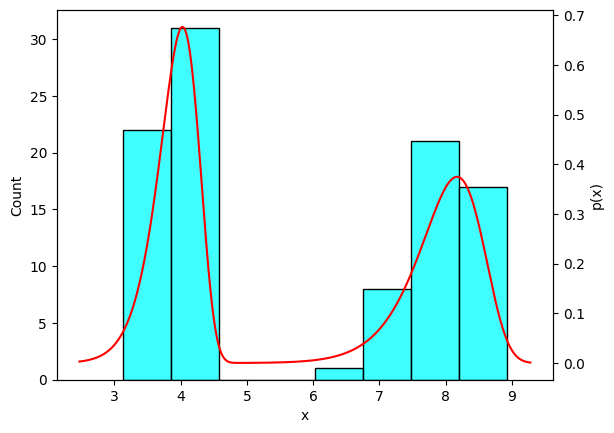



         name                                    params  prior_probability
0  WeibullExp  (2.5086567087014977, 1.3868949235206334)           0.454898
1  WeibullExp  (2.7334220553507143, 2.1019858255667097)           0.545102
samples count: 200
time         : 2.232
steps        : 16 / 16
error        : None


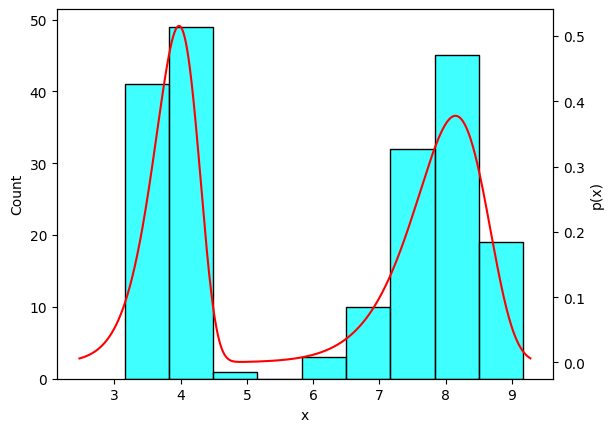



         name                                    params  prior_probability
0  WeibullExp    (2.796450537582807, 2.114024766274715)           0.478033
1  WeibullExp  (2.5138834487958146, 1.3833074703903472)           0.521967
samples count: 500
time         : 5.340
steps        : 13 / 16
error        : None


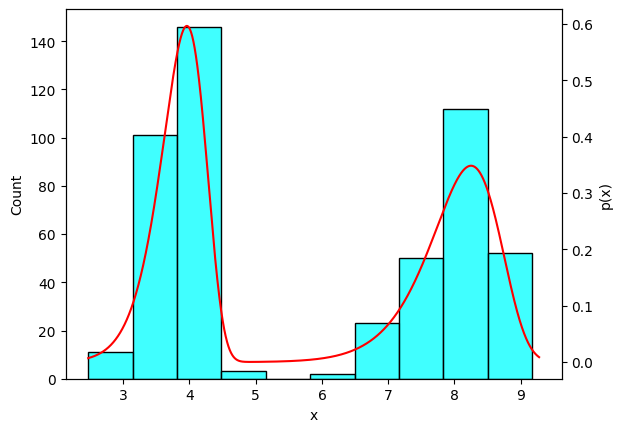



         name                                   params  prior_probability
0  WeibullExp  (2.110822764282604, 2.8960499767567116)                NaN
1  WeibullExp   (0.8205141563945495, 2.69289870193274)                NaN
2  WeibullExp  (46283.61091132664, -7402.649192912165)                NaN
samples count: 50
time         : 0.301
steps        : 3 / 16
error        : All models can't match due prior probability


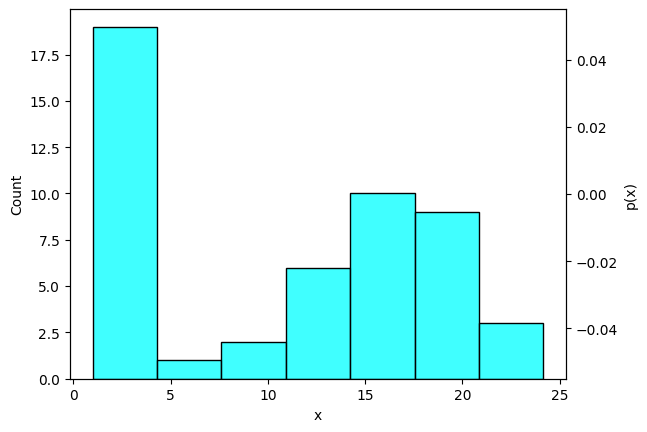



         name                                    params  prior_probability
0  WeibullExp  (1.6011533901409878, 2.9343349801180665)           0.632010
1  WeibullExp  (2.7830237500174624, 0.4030818154113632)           0.299212
2  WeibullExp  (1.3032197942211634, 1.7981001694190557)           0.068777
samples count: 100
time         : 0.900
steps        : 14 / 16
error        : None


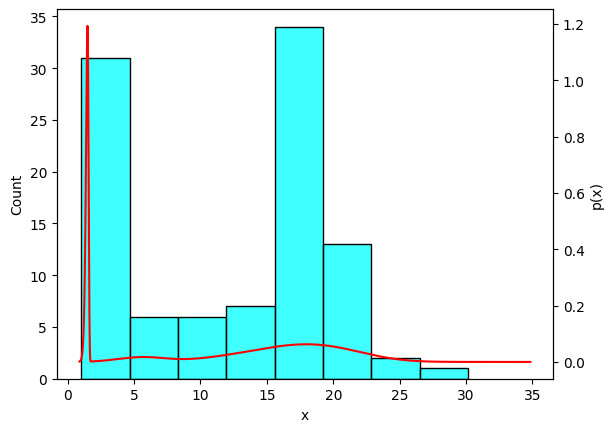



         name                                     params  prior_probability
0  WeibullExp  (1.8399966165012487, -0.9476881046723962)                NaN
1  WeibullExp   (2.794942882151195, 0.43045142151409443)           0.938575
2  WeibullExp   (3.989859559124948, 0.24045274472050082)           0.061425
samples count: 200
time         : 2.505
steps        : 16 / 16
error        : None


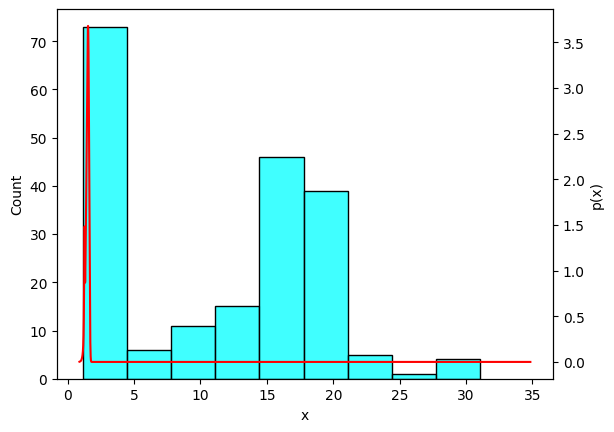



         name                                     params  prior_probability
0  WeibullExp  (2.6690920229990147, 0.41795739385395486)           0.322193
1  WeibullExp     (1.06322924754311, 1.6862114755335134)           0.043224
2  WeibullExp   (1.4273187439300739, 2.9262108584814017)           0.634583
samples count: 500
time         : 6.490
steps        : 15 / 16
error        : None


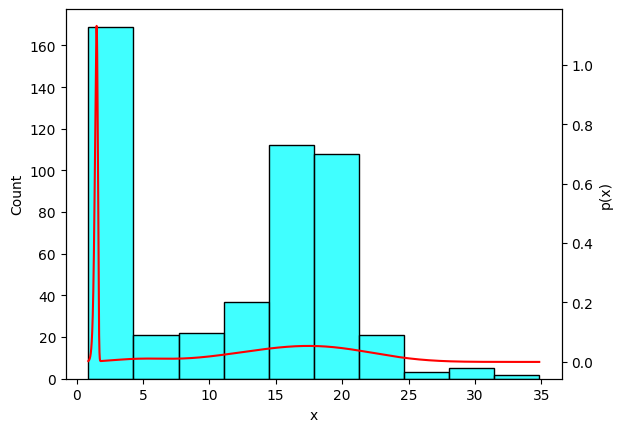



         name                                    params  prior_probability
0  WeibullExp   (14821.711871510246, -7013.97269890379)                NaN
1  WeibullExp  (3.1766585408622596, 2.3623120823895394)                NaN
2  WeibullExp   (3.957002468820268, 2.3997460773271246)                NaN
3  WeibullExp    (1.328822417019278, 1.642811917894871)                NaN
samples count: 50
time         : 1.160
steps        : 13 / 16
error        : All models can't match due prior probability


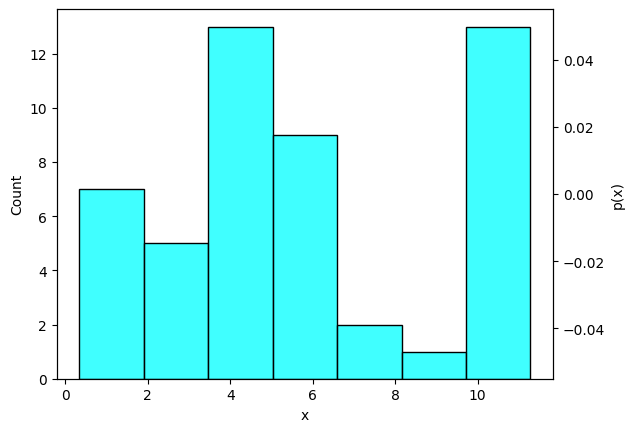



         name                                     params  prior_probability
0  WeibullExp  (2.3093748868142314, -1.0134519742107078)           0.229002
1  WeibullExp   (0.8652551052444963, 1.9494746534613834)           0.279306
2  WeibullExp    (0.858736879710208, 1.9281412669748148)           0.220002
3  WeibullExp   (0.8616482714225593, 1.9375116913966242)           0.271690
samples count: 100
time         : 0.477
steps        : 4 / 16
error        : None


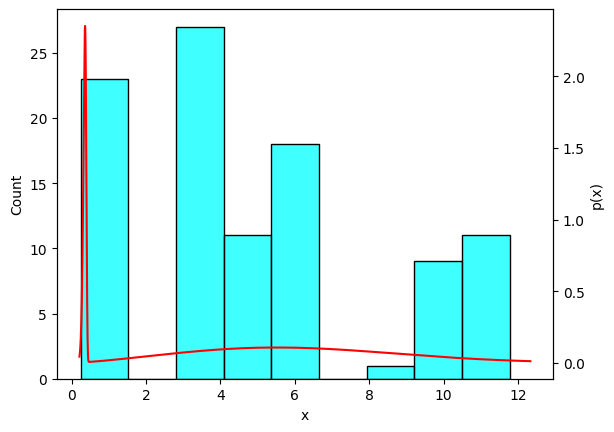



         name                                    params  prior_probability
0  WeibullExp  (1.1975697730431833, 1.5366665413355323)                NaN
1  WeibullExp  (5549.387331337297, -460.41551834038466)                NaN
2  WeibullExp   (1.5649292318630714, 2.314580481440434)                NaN
3  WeibullExp  (3.516856561870186, -0.9856333206246539)                NaN
samples count: 200
time         : 1.639
steps        : 5 / 16
error        : All models can't match due prior probability


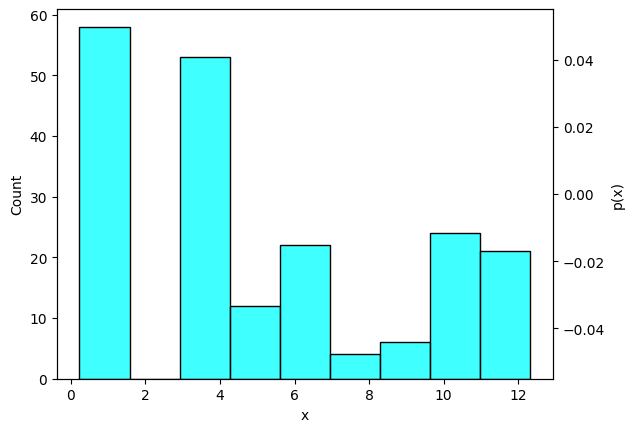



         name                                    params  prior_probability
0  WeibullExp   (2.9939760288218182, 1.275318307147212)           0.285055
1  WeibullExp  (1.9739518263228362, 1.7396056606000312)           0.224488
2  WeibullExp  (2.440239008593925, -0.9984199750820917)           0.262000
3  WeibullExp   (3.0088809139401236, 2.396129957508568)           0.228457
samples count: 500
time         : 5.171
steps        : 12 / 16
error        : None


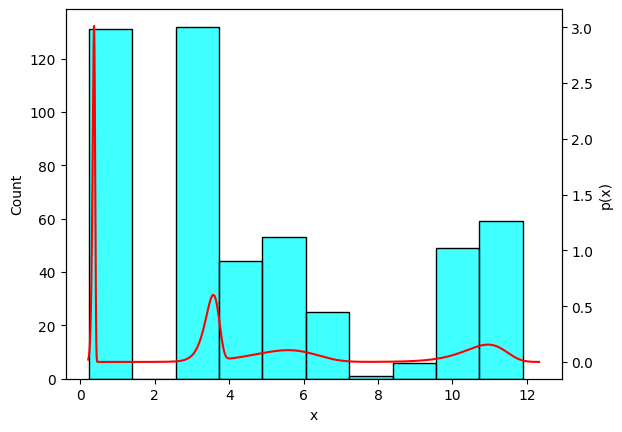



         name                                    params  prior_probability
0  WeibullExp  (2.0289451730083785, 1.9702774366682714)           0.135295
1  WeibullExp   (3.379434350040275, 2.8467943359593058)           0.050413
2  WeibullExp  (-0.1412193642094111, 2.866915104833391)           0.450583
3  WeibullExp  (3.0402275643361008, 1.4806278072099097)           0.245972
4  WeibullExp  (3.1878895233753757, 0.3766277875638345)           0.117737
samples count: 50
time         : 1.052
steps        : 12 / 16
error        : None


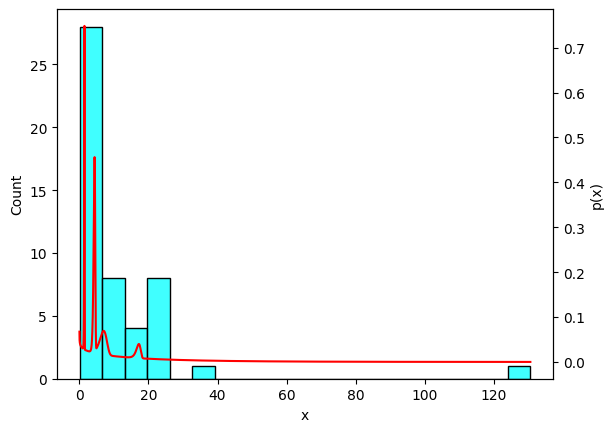



         name                                     params  prior_probability
0  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN
1  WeibullExp  (1.3177697799218373, -0.9898906401260508)                NaN
2  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN
3  WeibullExp  (1.3177697799218373, -0.9898906401260508)                NaN
4  WeibullExp  (2.7419129448009416, -0.7435614105637862)                NaN
samples count: 100
time         : 0.679
steps        : 5 / 16
error        : All models can't match due prior probability


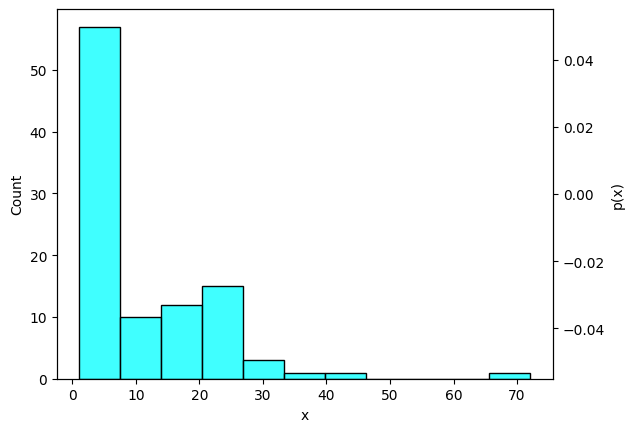



         name                                     params  prior_probability
0  WeibullExp    (2.8184418702103353, 1.492328625740587)           0.238492
1  WeibullExp     (2.472912953319219, 0.418737635239967)           0.151028
2  WeibullExp    (4.767142169290174, -1.345182040839158)           0.004922
3  WeibullExp  (0.25929194953452717, 2.7581608195158642)           0.533777
4  WeibullExp  (2.9148700721235983, 0.35798880159727436)           0.071781
samples count: 200
time         : 21.645
steps        : 15 / 16
error        : None


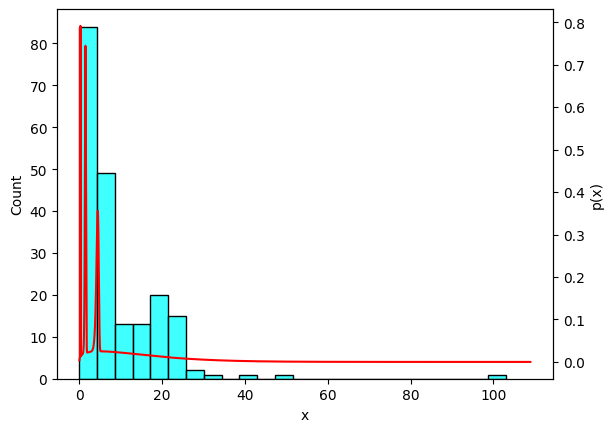



         name                                     params  prior_probability
0  WeibullExp   (1.3763489302306133, 2.9958764058934526)                NaN
1  WeibullExp  (-0.09158063893789493, 3.031407204960985)                NaN
2  WeibullExp  (13.867974691128428, -1.3465620011322998)                NaN
3  WeibullExp     (2.32549842750096, 1.5265942374902852)                NaN
4  WeibullExp  (0.47037814251345456, 1.0411775061364084)                NaN
samples count: 500
time         : 3.015
steps        : 3 / 16
error        : All models can't match due prior probability


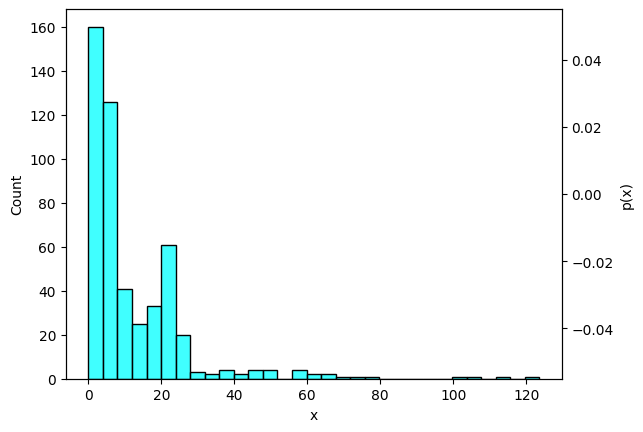



       name                                   params  prior_probability
0  Gaussian  (12.642451893250453, 2.672739931569174)                1.0
samples count: 50
time         : 0.030
steps        : 2 / 16
error        : None


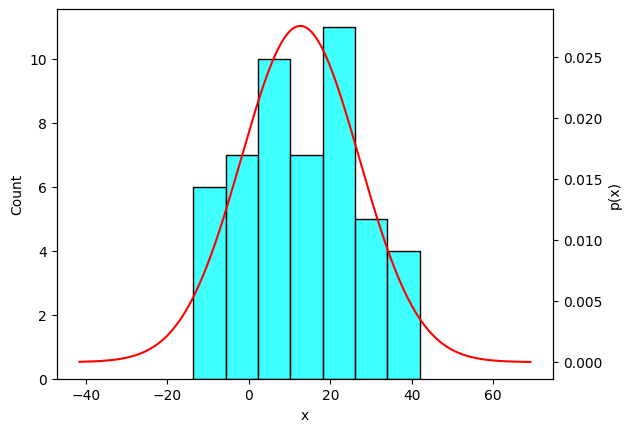



       name                                    params  prior_probability
0  Gaussian  (18.729179256111372, 2.8633213550129537)                1.0
samples count: 100
time         : 0.106
steps        : 3 / 16
error        : None


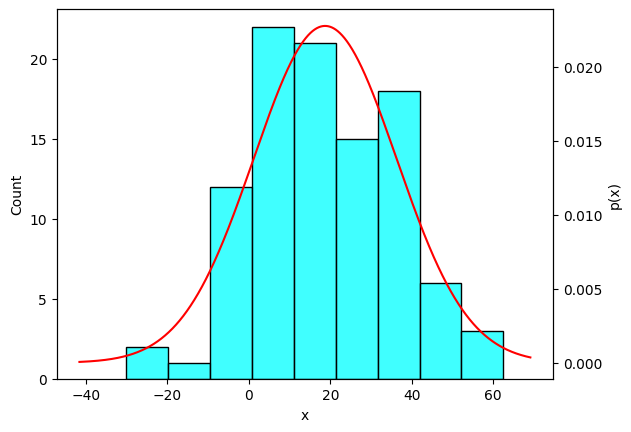



       name                                    params  prior_probability
0  Gaussian  (14.988932588253311, 2.8236003663242926)                1.0
samples count: 200
time         : 0.143
steps        : 2 / 16
error        : None


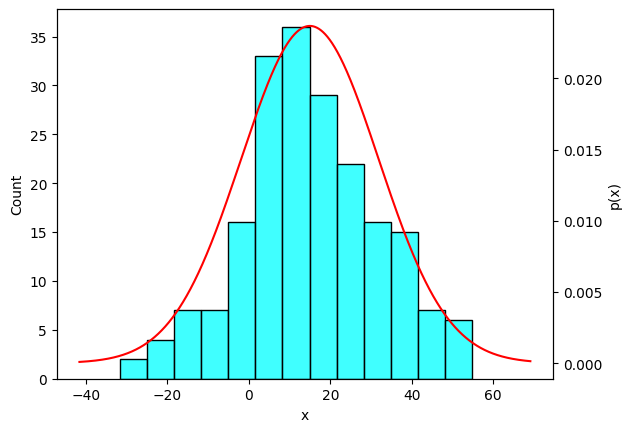



       name                                    params  prior_probability
0  Gaussian  (14.553395330474682, 2.8301939749749683)                1.0
samples count: 500
time         : 0.313
steps        : 2 / 16
error        : None


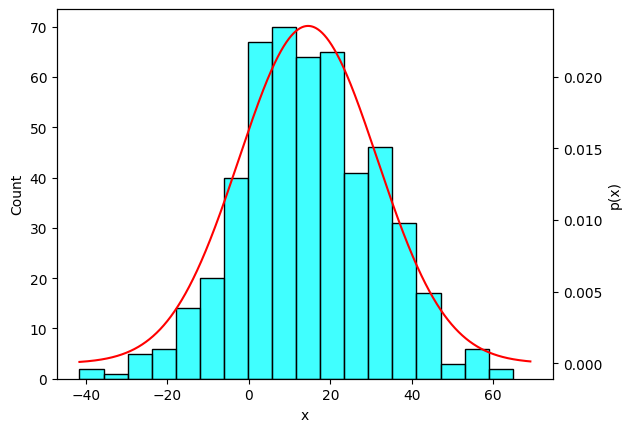



       name                                     params  prior_probability
0  Gaussian     (9.554996934583476, 2.616863511098453)            0.96244
1  Gaussian  (13.702291293273209, -1.6793375871549505)            0.03756
samples count: 50
time         : 0.364
steps        : 5 / 16
error        : None


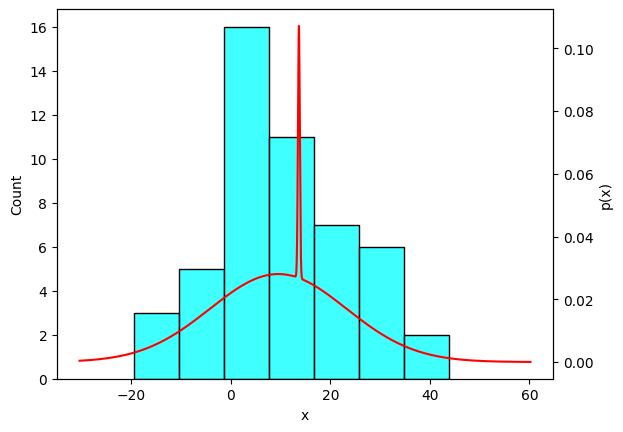



       name                                  params  prior_probability
0  Gaussian  (18.92972755601343, 2.628129080705629)           0.300108
1  Gaussian  (4.329557178477096, 2.420111008525402)           0.699892
samples count: 100
time         : 0.734
steps        : 16 / 16
error        : None


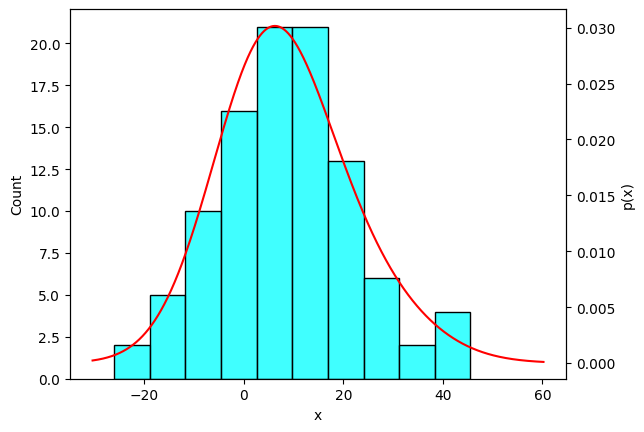



       name                                    params  prior_probability
0  Gaussian   (15.406582059422046, -1.57493084690221)           0.012719
1  Gaussian  (10.603076700959258, 2.6135450837021534)           0.987281
samples count: 200
time         : 4.227
steps        : 16 / 16
error        : None


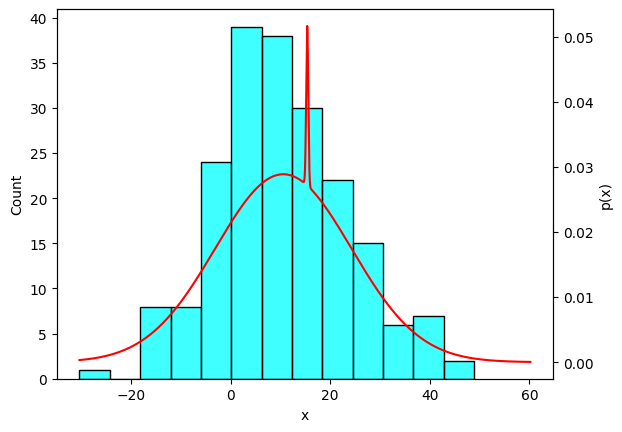



       name                                     params  prior_probability
0  Gaussian  (22.05935176136072, -0.30913299980022974)           0.010498
1  Gaussian    (10.650039728007343, 2.670379576932127)           0.989502
samples count: 500
time         : 7.602
steps        : 16 / 16
error        : None


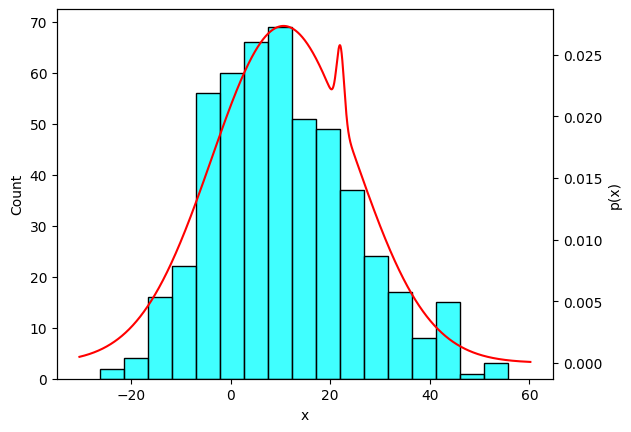



       name                                     params  prior_probability
0  Gaussian     (32.97451396649844, 1.048152714407711)           0.090714
1  Gaussian  (5.7893345810444705, 0.44371785075646397)           0.231891
2  Gaussian   (17.820995352765554, 3.2326513639618604)           0.677394
samples count: 50
time         : 0.744
steps        : 16 / 16
error        : None


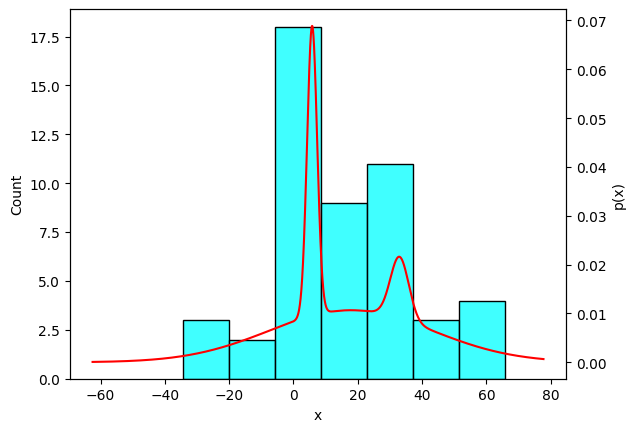



       name                                      params  prior_probability
0  Gaussian       (9.42695074036983, 3.139315365239891)            0.80289
1  Gaussian  (18.54003266674055, -0.043238195467129224)                NaN
2  Gaussian    (7.4675992712631585, 0.6524113687954207)            0.19711
samples count: 100
time         : 7.350
steps        : 16 / 16
error        : None


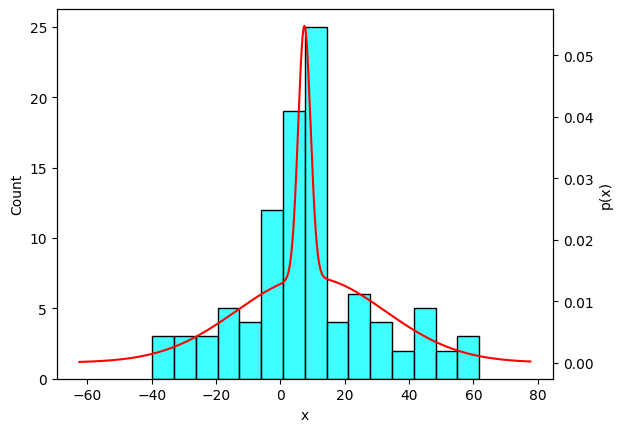



       name                                    params  prior_probability
0  Gaussian  (11.163692635626116, 3.0634174817196493)           0.758181
1  Gaussian  (7.1552898549882835, 0.9554554656334816)           0.214421
2  Gaussian  (13.48943824535108, -1.1866182800307836)           0.027398
samples count: 200
time         : 5.308
steps        : 16 / 16
error        : None


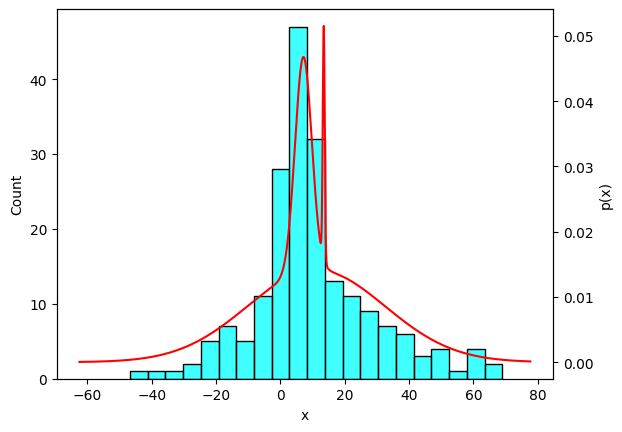



       name                                     params  prior_probability
0  Gaussian    (6.891350394218336, 1.4304236827317311)           0.371769
1  Gaussian  (24.945761606770386, -0.9302209586162176)           0.007990
2  Gaussian   (15.253455041448461, 3.1444679667784174)           0.620240
samples count: 500
time         : 9.957
steps        : 16 / 16
error        : None


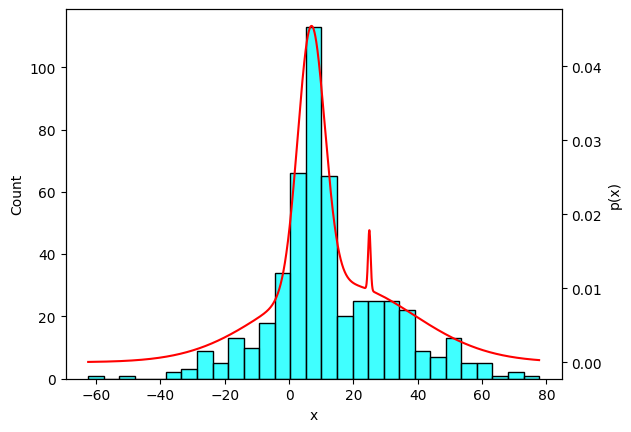



       name                                     params  prior_probability
0  Gaussian   (4.988874451217698, 0.05577128080326264)           0.165469
1  Gaussian  (13.91866529492354, -0.35989955822712205)           0.076081
2  Gaussian  (17.778389620769754, -0.8588880824515488)           0.070434
3  Gaussian    (8.744033748822849, 2.6216685059703906)           0.688016
samples count: 50
time         : 1.420
steps        : 16 / 16
error        : None


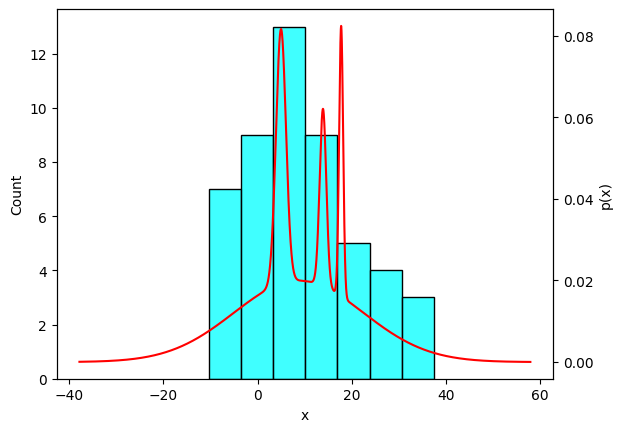



       name                                     params  prior_probability
0  Gaussian  (17.300666966472598, 0.02328713885733955)           0.030025
1  Gaussian   (12.262375479539934, 2.6834158155764896)           0.488712
2  Gaussian   (6.206307124991164, -1.8678137286598149)           0.004651
3  Gaussian     (12.34512152035806, 2.684353564306088)           0.476612
samples count: 100
time         : 2.389
steps        : 16 / 16
error        : None


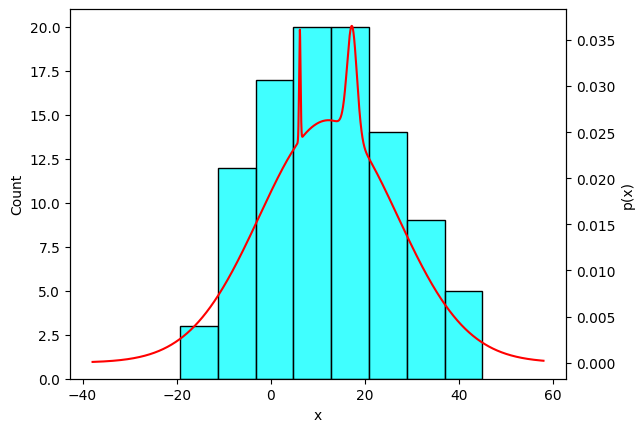



       name                                   params  prior_probability
0  Gaussian  (24.61306820618712, 1.8097779937282474)           0.124824
1  Gaussian  (5.00927231408571, -0.6745822047910399)           0.039434
2  Gaussian  (8.439416568643743, 2.7574511086959643)           0.795266
3  Gaussian  (15.68106182508541, 0.7342560530893272)           0.040476
samples count: 200
time         : 5.097
steps        : 16 / 16
error        : None


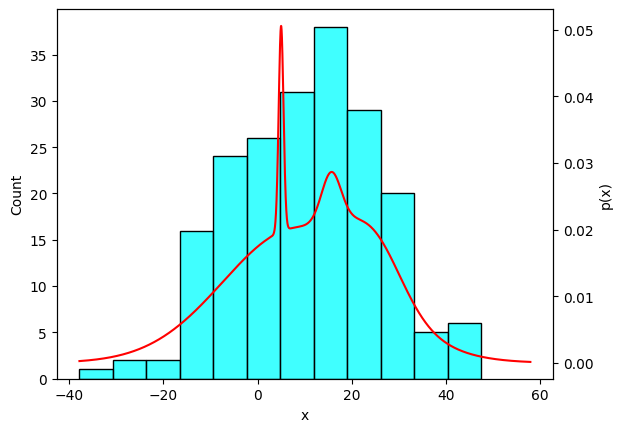



       name                                      params  prior_probability
0  Gaussian    (3.5121410931318033, 1.9608789262503685)           0.065180
1  Gaussian    (16.155107351001792, 0.9099391784590628)           0.048406
2  Gaussian  (25.226352838696105, -0.43770787063899685)           0.008269
3  Gaussian     (12.247884943487945, 2.744068560519831)           0.878145
samples count: 500
time         : 13.175
steps        : 16 / 16
error        : None


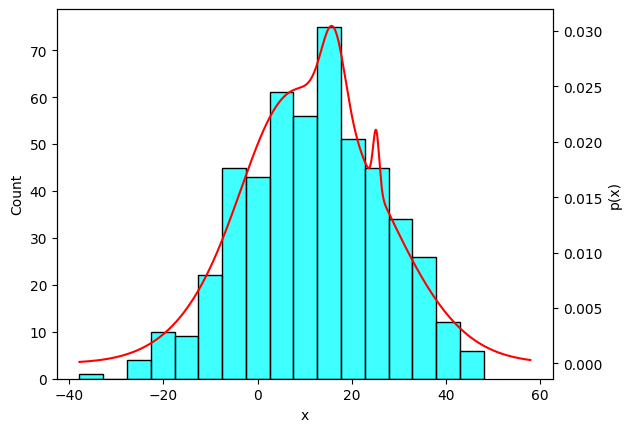



       name                                     params  prior_probability
0  Gaussian  (13340.048241302127, -1123420.9323939069)                NaN
1  Gaussian    (16.454439368112777, 2.866059347200627)                NaN
2  Gaussian   (10.745943601407324, 1.3913975793332294)                NaN
3  Gaussian   (17.094696637835067, 1.0891426832517184)                NaN
4  Gaussian   (2.947643403323124, 0.04939273775325814)                NaN
samples count: 50
time         : 1.410
steps        : 12 / 16
error        : All models can't match due prior probability


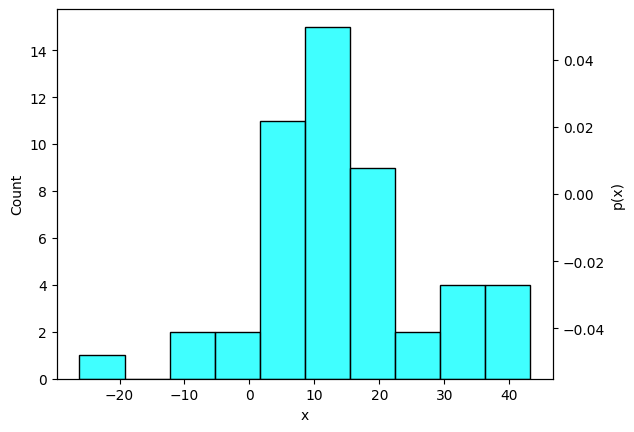



       name                                      params  prior_probability
0  Gaussian    (16.134552270452183, 2.8902909502668455)           0.645265
1  Gaussian      (9.401897071616318, 1.160815210059553)           0.249212
2  Gaussian    (20.10481288340471, 0.44900180424527714)           0.069409
3  Gaussian  (18.902632319973357, -0.47454299302552116)           0.020539
4  Gaussian    (16.274663614272153, -2.846036361491822)           0.015574
samples count: 100
time         : 5.080
steps        : 16 / 16
error        : None


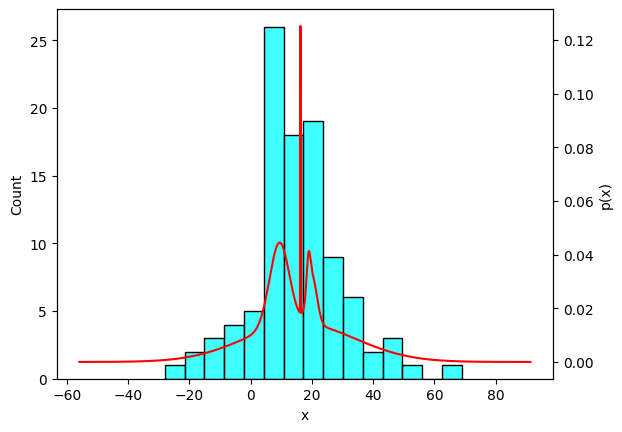



       name                                    params  prior_probability
0  Gaussian  (25.72435214262363, -1.8788390502351429)           0.019508
1  Gaussian  (16.074870837703834, 1.0256909980427116)           0.040944
2  Gaussian   (14.091143896528267, 2.875532420375398)           0.609182
3  Gaussian  (10.440318844440656, 1.0255258702196781)           0.238013
4  Gaussian  (22.247648345844876, 1.6348900544055758)           0.092354
samples count: 200
time         : 6.638
steps        : 16 / 16
error        : None


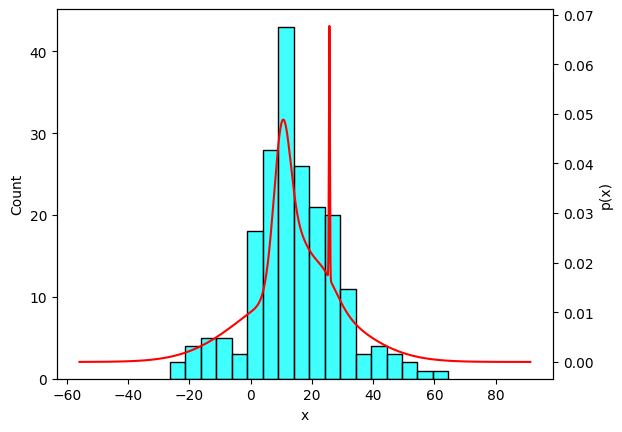



       name                                     params  prior_probability
0  Gaussian   (10.292259637519667, 0.8484268274460751)           0.215115
1  Gaussian   (4.767143101391042, -1.2199927450533932)           0.021888
2  Gaussian    (13.968386863046906, 2.859878749049115)           0.654332
3  Gaussian     (22.164495520980598, 0.94652831617378)           0.064684
4  Gaussian  (13.984995912705358, -0.9056812809326291)           0.043980
samples count: 500
time         : 18.065
steps        : 16 / 16
error        : None


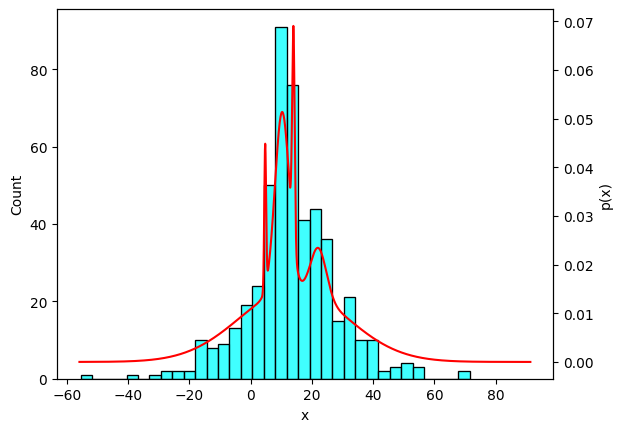

In [4]:
for result in results:

    table = [
        [d.model.name(), tuple(d.params), d.prior_probability]
        for d in result.result.distributions
    ]
    df = pd.DataFrame(table, columns=["name", "params", "prior_probability"])
    print(df)
    print(f"samples count: {len(result.test.data)}")
    print(f"time         : {result.time:.3f}")
    print(f"steps        : {result.result.steps} / {result.test.max_steps}")
    print(f"error        : {result.result.error}")

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("x")

    sns.histplot(result.test.data, color="cyan")
    ax2 = ax1.twinx()
    ax2.set_ylabel("p(x)")

    min_data = min(result.test.base_data)
    max_data = max(result.test.base_data)

    def p(x):
        s = 0
        for d in result.result.distributions:
            if d.prior_probability is not None:
                s += d.prior_probability * d.model.p(x, d.params)
        return s

    X = list(np.linspace(min_data, max_data, int(np.abs(max_data - min_data) * 512)))
    Y = [p(x) for x in X]
    ax2.plot(X, Y, color="red")
    plt.show()
    print()
    print()